<a href="https://colab.research.google.com/github/joyreuben/E.coli_AMR_Analysis/blob/main/E_coli.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [22]:
# Read the tab-separated files
df1 = pd.read_csv("/content/amr_results_E.coli1.tabular", sep='\t')
df2 = pd.read_csv("/content/amr_results_E.coli2.tabular", sep="\t")
df3 = pd.read_csv("/content/amr_results_E.coli3.tabular", sep="\t")
df4 = pd.read_csv("/content/amr_results_E.coli4.tabular", sep="\t")
df5 = pd.read_csv("/content/amr_results_E.coli5.tabular", sep="\t")

In [23]:
# Add strain identifiers for differentiation
df1['Strain'] = 'E.coli1'
df2['Strain'] = 'E.coli2'
df3['Strain'] = 'E.coli3'
df4['Strain'] = 'E.coli4'
df5['Strain'] = 'E.coli5'

In [24]:
# Combine all dataframes
all_data = pd.concat([df1, df2, df3, df4, df5])
# Count each antibiotic resistance gene occurrence per strain
gene_counts = all_data.groupby(["Strain", "GENE"]).size().reset_index(name="Count")


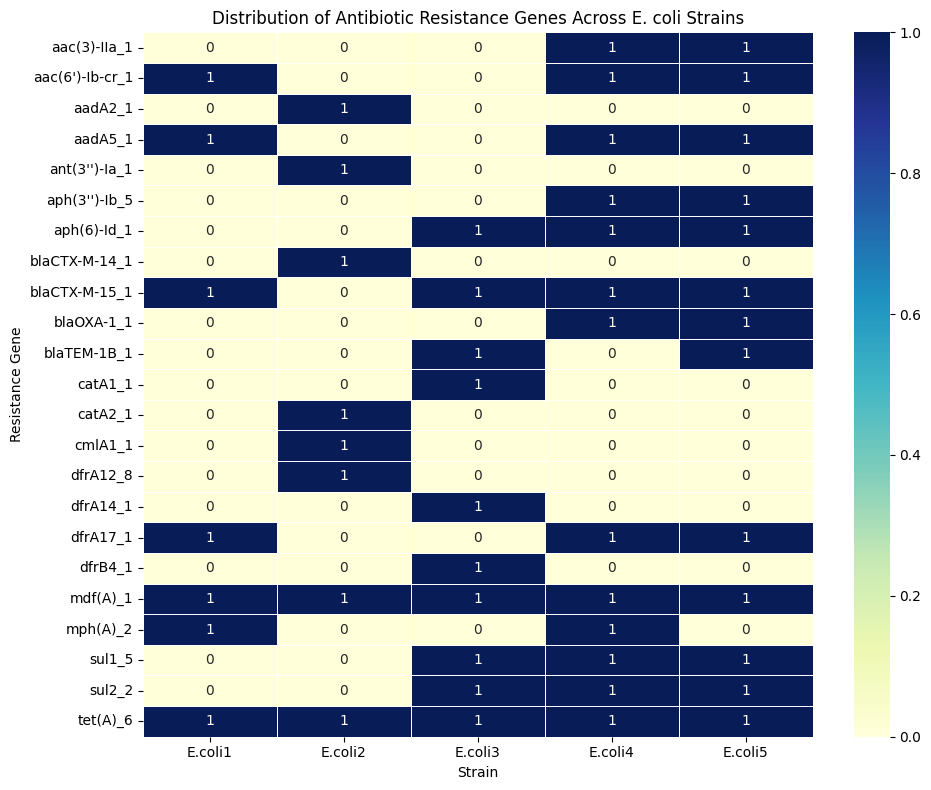

In [25]:
# Reshape data for heatmap: rows = genes, columns = strains
heatmap_data = gene_counts.pivot(index="GENE", columns="Strain", values="Count").fillna(0)
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", linewidths=0.5, fmt=".0f")
plt.title("Distribution of Antibiotic Resistance Genes Across E. coli Strains")
plt.xlabel("Strain")
plt.ylabel("Resistance Gene")
plt.xticks(rotation=0)
plt.tight_layout()
